In [1]:
import pandas as pd 

file_path='/Users/user/Desktop/python projects/fifa.csv'
df=pd.read_csv(file_path)
print(df)


           ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https

In [3]:
columns_to_drop=['ID', 'Photo', 'Flag', 'Club Logo', 'Preferred Foot', 
                   'International Reputation', 'Work Rate', 'Body Type', 
                   'Position', 'Jersey Number', 'Loaned From']

df=df.drop(columns=columns_to_drop)
print(df)

                     Name  Age Nationality  Overall  Potential  \
0                L. Messi   31   Argentina       94         94   
1       Cristiano Ronaldo   33    Portugal       94         94   
2               Neymar Jr   26      Brazil       92         93   
3                  De Gea   27       Spain       91         93   
4            K. De Bruyne   27     Belgium       91         92   
...                   ...  ...         ...      ...        ...   
18202        J. Lundstram   19     England       47         65   
18203  N. Christoffersson   19      Sweden       47         63   
18204           B. Worman   16     England       47         67   
18205      D. Walker-Rice   17     England       47         66   
18206           G. Nugent   16     England       46         66   

                      Club    Value   Wage  Weak Foot  Skill Moves  ...  \
0             FC Barcelona  €110.5M  €565K        4.0          4.0  ...   
1                 Juventus     €77M  €405K        4.0    

In [5]:
def currency_convert(value):
    if pd.isna(value):
        return value
    value= value.replace('€','').replace('K','e3').replace('M','e6')
    return float(value)

df['Value']=df['Value'].apply(currency_convert)
df['Wage']=df['Wage'].apply(currency_convert)
df['Release Clause']=df['Release Clause'].apply(currency_convert)

print(df[['Value','Wage','Release Clause']].head())

         Value      Wage  Release Clause
0  110500000.0  565000.0     226500000.0
1   77000000.0  405000.0     127100000.0
2  118500000.0  290000.0     228100000.0
3   72000000.0  260000.0     138600000.0
4  102000000.0  355000.0     196400000.0


In [7]:
df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce').dt.year


print(df['Joined'].head())

C:\Users\user\AppData\Local\Temp\ipykernel_9488\544011705.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce').dt.year


0    2004.0
1    2018.0
2    2017.0
3    2011.0
4    2015.0
Name: Joined, dtype: float64


In [9]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'], errors='coerce')

print(df['Contract Valid Until'].head())


0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]


In [11]:
df['Height'] = df['Height'].str.replace('"', '').str.split("'").apply(
    lambda x: int(x[0]) * 12 + int(x[1]) if isinstance(x, list) else None).astype(float)


print(df['Height'].head())

0    67.0
1    74.0
2    69.0
3    76.0
4    71.0
Name: Height, dtype: float64


In [13]:
df['Weight'] = df['Weight'].str.replace('lbs', '').astype(float)

print(df['Weight'].head())

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64


In [15]:
missing_values = df.isnull().sum()
print("Missing values before imputation:")
print(missing_values)


df.fillna(df.mean(numeric_only=True), inplace=True)


missing_values_after = df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after)

Missing values before imputation:
Name                       0
Age                        0
Nationality                0
Overall                    0
Potential                  0
Club                     241
Value                      0
Wage                       0
Weak Foot                 48
Skill Moves               48
Joined                  1553
Contract Valid Until    1553
Height                    48
Weight                    48
Crossing                  48
Finishing                 48
HeadingAccuracy           48
ShortPassing              48
Volleys                   48
Dribbling                 48
Curve                     48
FKAccuracy                48
LongPassing               48
BallControl               48
Acceleration              48
SprintSpeed               48
Agility                   48
Reactions                 48
Balance                   48
ShotPower                 48
Jumping                   48
Stamina                   48
Strength                  48
LongShots

Matplotlib is building the font cache; this may take a moment.


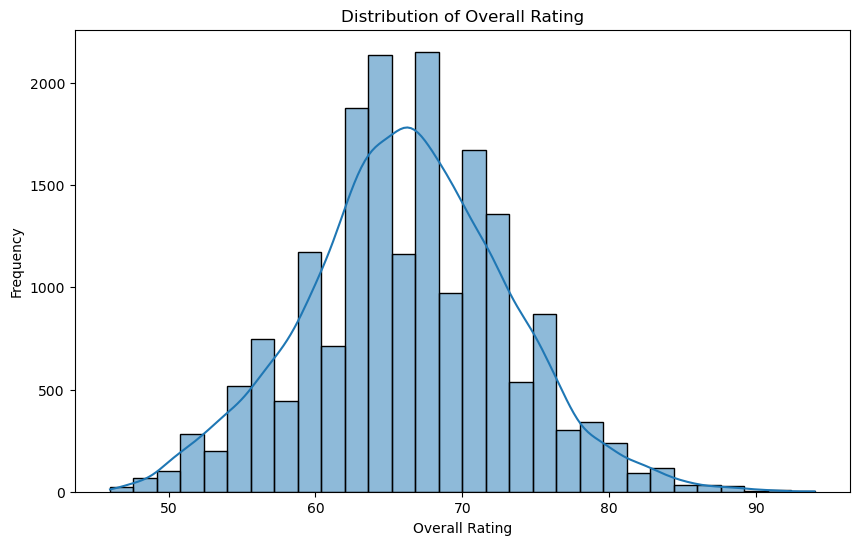

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall'], kde=True, bins=30)
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


In [47]:
print("Columns in the dataframe:")
print(df.columns.tolist())
pairplot_vars = ['Overall','Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']


missing_columns = [col for col in pairplot_vars if col not in df.columns]
if missing_columns:
    print(f"The following columns are missing in the dataframe: {missing_columns}")
else:
    
    sns.pairplot(df[pairplot_vars].dropna())
    plt.show()


Columns in the dataframe:
['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Weak Foot', 'Skill Moves', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']
The following columns are missing in the dataframe: ['International Reputation']


In [51]:
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'],errors='coerce')

top_20=df[df['Contract Valid Until'].dt.year==2020].nlargest(20,'Overall')

avg_wage_2020=top_20['Wage'].mean()
avg_age_2020=top_20['Age'].mean()

correlation_val_2020=top_20['Overall'].corr(top_20['Value'])

print("Top 20 Players whose contract expires in 2020:")
print(top_20[['Name', 'Overall', 'Wage', 'Age', 'Value']])
print(f"\nAverage Wage: {avg_wage_2020}")
print(f"Average Age: {avg_age_2020}")
print(f"Correlation between Overall and Value: {correlation_val_2020}")


Top 20 Players whose contract expires in 2020:
               Name  Overall      Wage  Age       Value
3            De Gea       91  260000.0   27  72000000.0
5         E. Hazard       91  340000.0   27  93000000.0
6         L. Modrić       91  420000.0   32  67000000.0
8      Sergio Ramos       91  380000.0   32  51000000.0
13      David Silva       90  285000.0   32  60000000.0
21        E. Cavani       89  200000.0   31  60000000.0
24     G. Chiellini       89  215000.0   33  27000000.0
31       C. Eriksen       88  205000.0   26  73500000.0
39     Thiago Silva       88  165000.0   33  24000000.0
46         K. Navas       87  195000.0   31  30500000.0
49       Jordi Alba       87  250000.0   29  38000000.0
50       D. Mertens       87  135000.0   31  45000000.0
52        M. Hamšík       87  125000.0   30  46500000.0
64      Alex Sandro       86  160000.0   27  36500000.0
71  T. Alderweireld       86  150000.0   29  39000000.0
73       M. Benatia       86  160000.0   31  30000000.0
7

In [59]:
positions = ['GK', 'DEF', 'MID', 'FWD']  

positions_full = (positions * (len(df) // len(positions) + 1))[:len(df)]
df['Position'] = positions_full


top_5_by_position = df.groupby('Position').apply(lambda x: x.nlargest(5, 'Overall')).reset_index(drop=True)


duplicate_players = top_5_by_position[top_5_by_position.duplicated(['Name'], keep=False)]['Name'].unique()


average_wage_top_5 = top_5_by_position['Wage'].mean()


print("\nTop 5 Players by Position:")
print(top_5_by_position[['Name', 'Overall', 'Wage', 'Position']])

print("\nPlayers appearing in more than one position table:")
print(duplicate_players)

print("\nAverage Wage for Top 5 Players in Each Position:")
print(average_wage_top_5)




Top 5 Players by Position:
                 Name  Overall      Wage Position
0   Cristiano Ronaldo       94  405000.0      DEF
1           E. Hazard       91  340000.0      DEF
2            J. Oblak       90   94000.0      DEF
3         David Silva       90  285000.0      DEF
4        A. Griezmann       89  145000.0      DEF
5              De Gea       91  260000.0      FWD
6           L. Suárez       91  455000.0      FWD
7            T. Kroos       90  355000.0      FWD
8           P. Dybala       89  205000.0      FWD
9         T. Courtois       89  240000.0      FWD
10           L. Messi       94  565000.0       GK
11       K. De Bruyne       91  355000.0       GK
12       Sergio Ramos       91  380000.0       GK
13           D. Godín       90  125000.0       GK
14            H. Kane       89  205000.0       GK
15          Neymar Jr       92  290000.0      MID
16          L. Modrić       91  420000.0      MID
17     R. Lewandowski       90  205000.0      MID
18           N. Kanté 

C:\Users\user\AppData\Local\Temp\ipykernel_9488\759983023.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_by_position = df.groupby('Position').apply(lambda x: x.nlargest(5, 'Overall')).reset_index(drop=True)
